# **Install Required Libraries**

In [23]:
# Install necessary libraries including Pandas, NumPy, Matplotlib, Plotly, and Dash.
!pip install pandas numpy matplotlib plotly dash gdown

# **Import Required Libraries**

In [24]:
# Import necessary libraries for data loading and analysis.
import pandas as pd
import gdown

# **Download and Load Dataset**

In [25]:
# Google Drive link to the dataset
url = "https://drive.google.com/uc?id=1ibxofEW5YmE-rl2dHN2QT69bv96h0Jv3"

# Download the dataset
gdown.download(url, 'heart_disease_data.csv', quiet=False)

# Load dataset into a Pandas DataFrame
df = pd.read_csv('heart_disease_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1ibxofEW5YmE-rl2dHN2QT69bv96h0Jv3
To: /content/heart_disease_data.csv
100%|██████████| 38.1k/38.1k [00:00<00:00, 42.8MB/s]


# **Data Preprocessing**

**1. Viewing Dataset**

In [26]:
# Display the first few rows of the dataset
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


**2. Handle Missing Values**

In [27]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values with median for numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Check for missing values in categorical columns
if not df[categorical_cols].empty:
    # Fill missing values with mode for categorical columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**3. Encode Categorical Variables**

In [28]:
# Encode categorical variables into numerical representations
df = pd.get_dummies(df, columns=['sex'])

**4. Split Dataset**

In [29]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# **Exploratory Data Analysis (EDA)**

**1. Calculate summary statistics for the dataset.**

In [30]:
summary_stats = df.describe()
print(summary_stats)

               age           cp     trestbps        chol          fbs  \
count  1025.000000  1025.000000  1025.000000  1025.00000  1025.000000   
mean     54.434146     0.942439   131.611707   246.00000     0.149268   
std       9.072290     1.029641    17.516718    51.59251     0.356527   
min      29.000000     0.000000    94.000000   126.00000     0.000000   
25%      48.000000     0.000000   120.000000   211.00000     0.000000   
50%      56.000000     1.000000   130.000000   240.00000     0.000000   
75%      61.000000     2.000000   140.000000   275.00000     0.000000   
max      77.000000     3.000000   200.000000   564.00000     1.000000   

           restecg      thalach        exang      oldpeak        slope  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529756   149.114146     0.336585     1.071512     1.385366   
std       0.527878    23.005724     0.472772     1.175053     0.617755   
min       0.000000    71.000000     0.000000  

**2. Visualize Data**

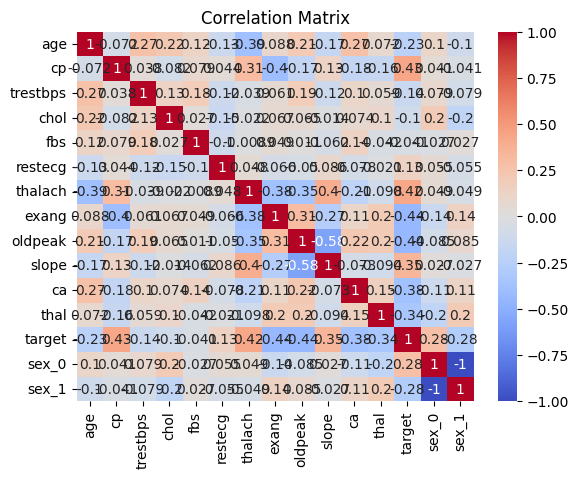

In [31]:
# Create basic visualizations using Matplotlib and Plotly.
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

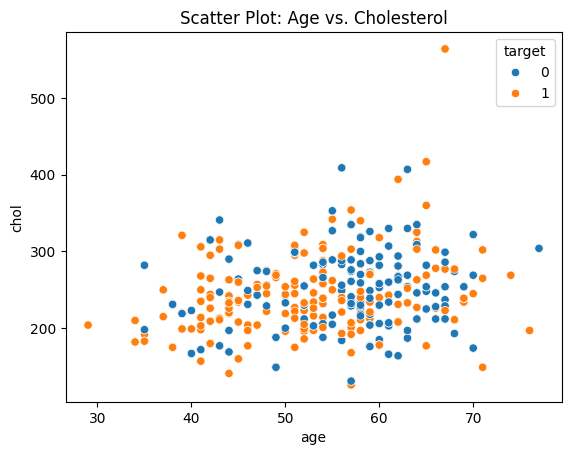

In [32]:
# Scatter plot
sns.scatterplot(data=df, x='age', y='chol', hue='target')
plt.title('Scatter Plot: Age vs. Cholesterol')
plt.show()

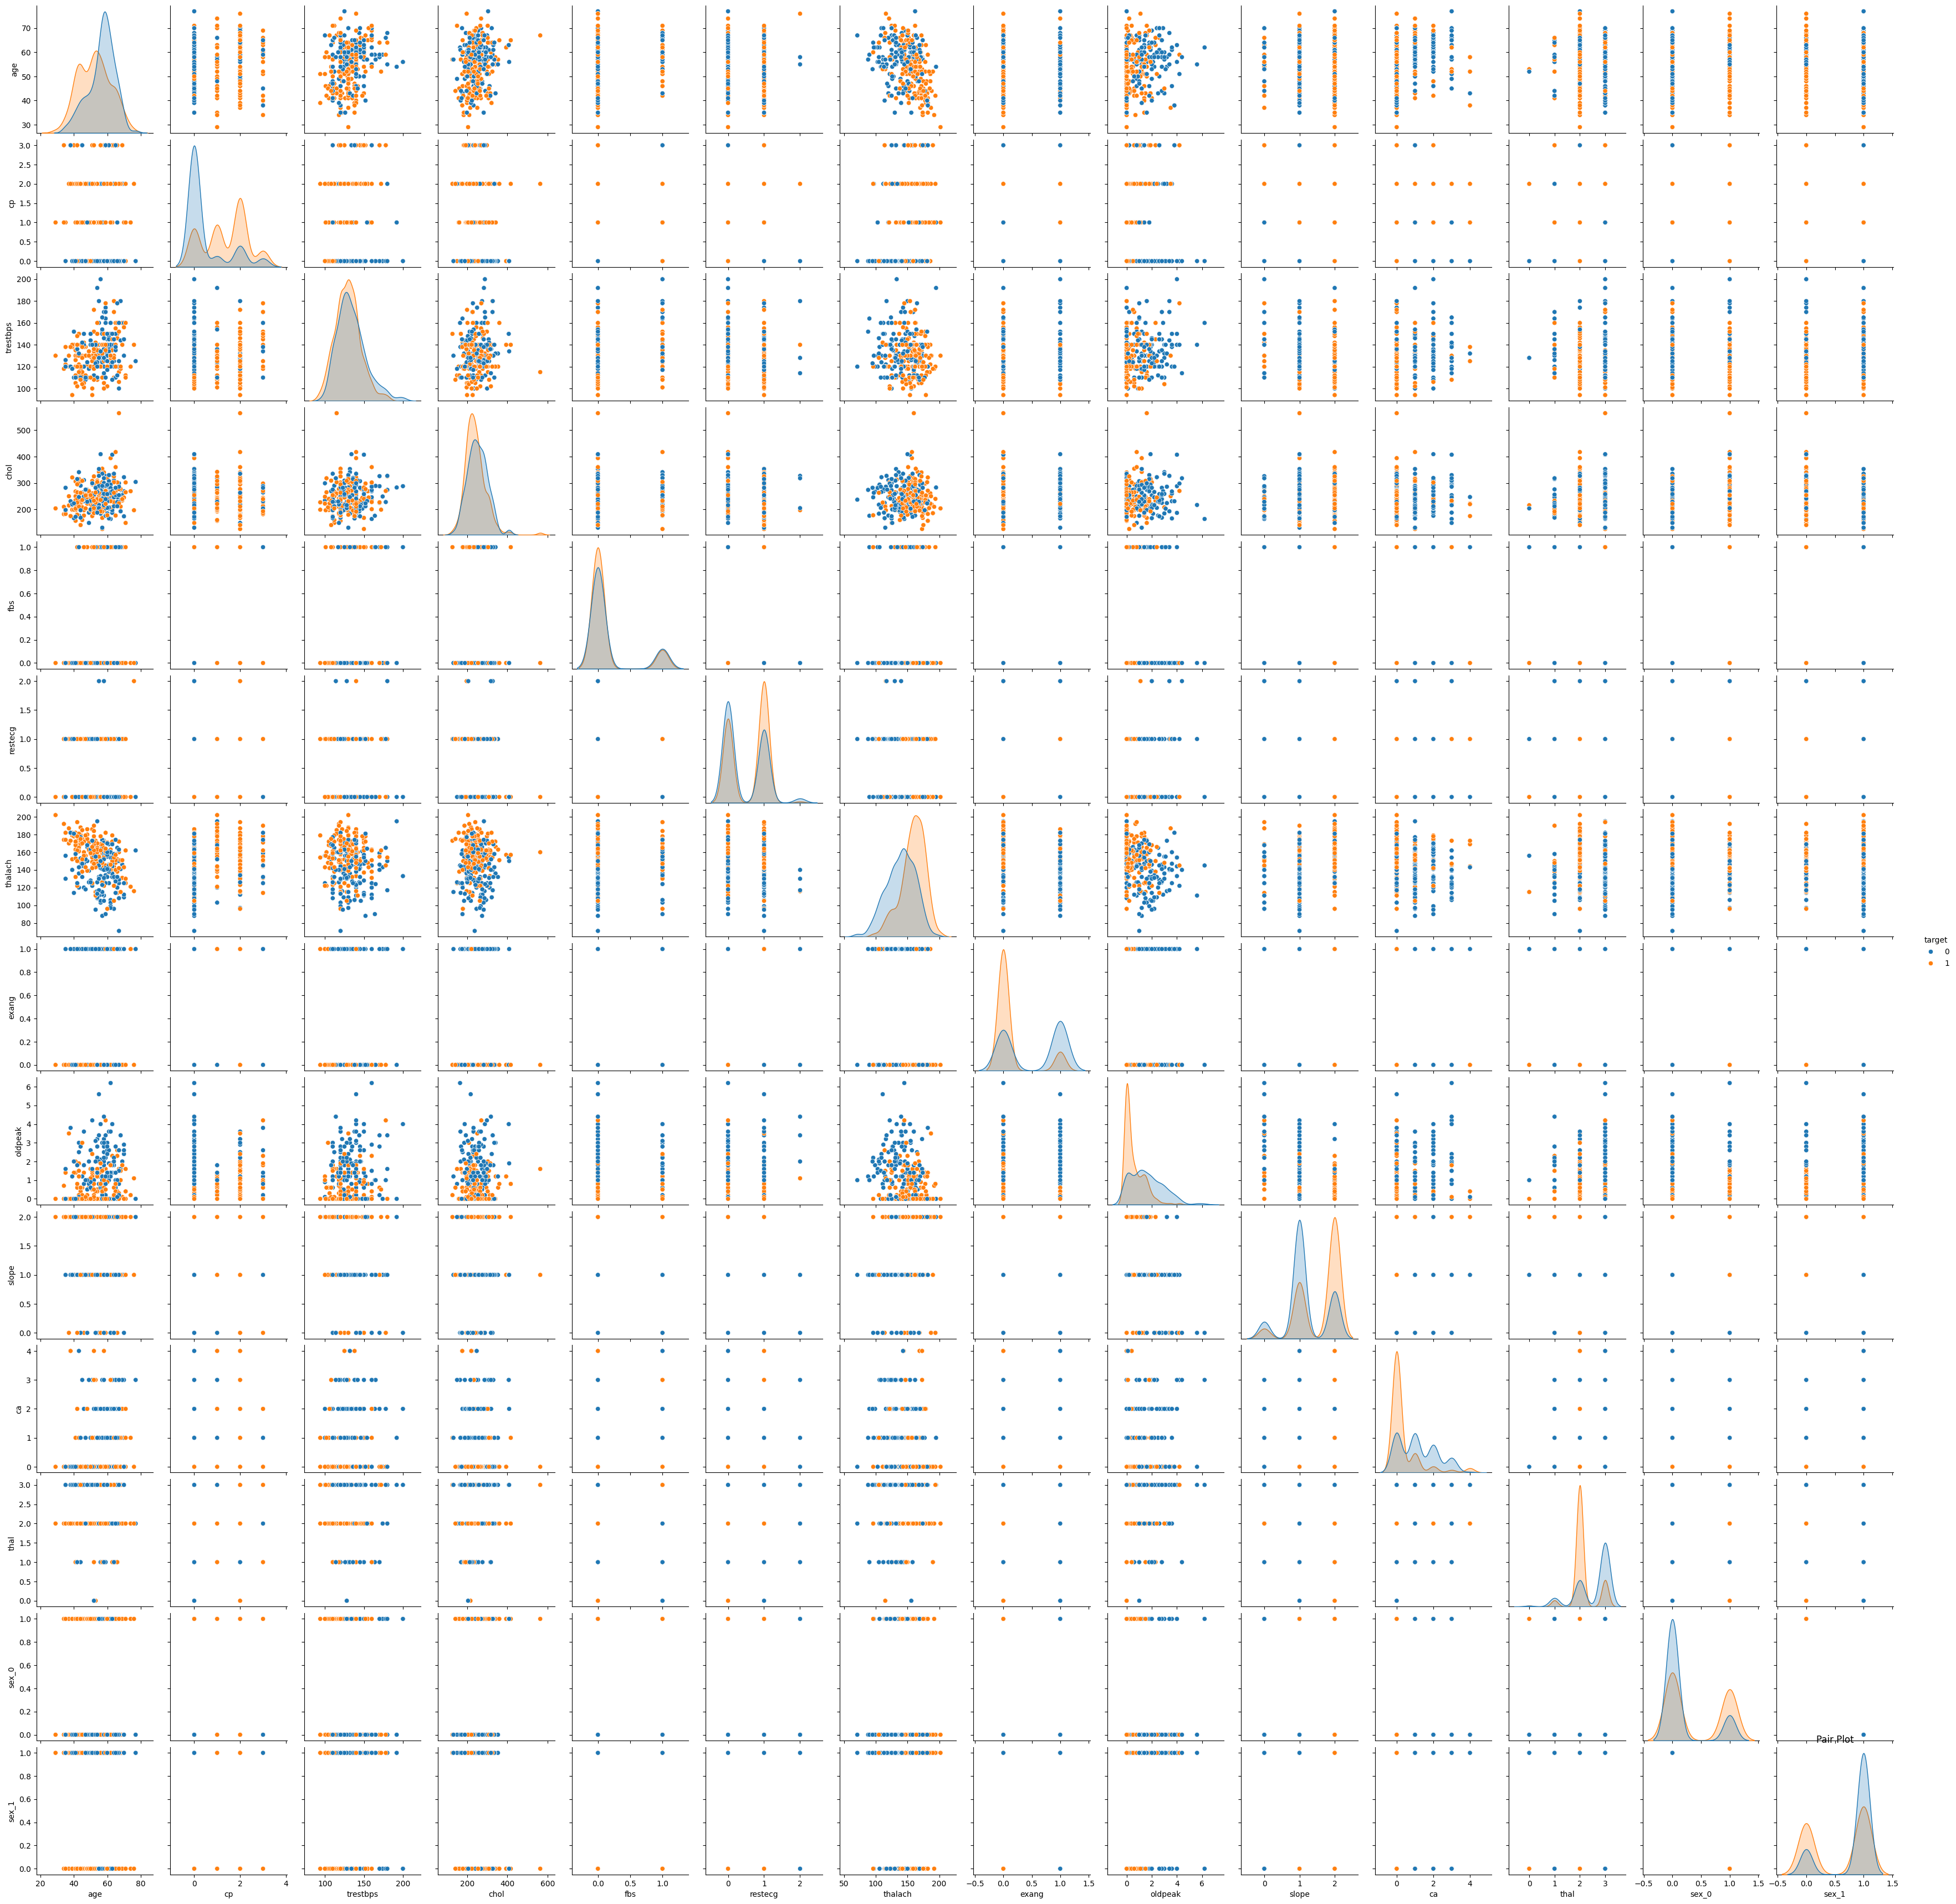

In [33]:
# Pair plot
sns.pairplot(df, hue='target')
plt.title('Pair Plot')
plt.show()

In [34]:
import plotly.express as px

# Box plot of age vs. target
px.box(df, x='target', y='age', title='Age vs. Target')

**3. Identify Correlations**

In [35]:
# Explore correlations between features using correlation matrices or heatmaps.
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
px.imshow(correlation_matrix)

# **Model Building**

**1. Train Machine Learning Model**

In [36]:
# Train a classification model using scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.9853658536585366


**2. Evaluate Additional Metrics**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have your features in X and labels in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, lr_predictions)
recall = recall_score(y_test, lr_predictions)
f1 = f1_score(y_test, lr_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1-score: 0.8108108108108107


In [39]:
# Placeholder data and graphs
fig_age_histogram = {}  # Placeholder for age histogram
fig_age_vs_target_boxplot = {}  # Placeholder for age vs target boxplot

# **Dashboard Creation with Plotly Dash**

**1. Import Dash Components**

In [40]:
# Import necessary components from Dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

**2. Initializing the app name**

In [41]:
# Initialize the Dash app
app = dash.Dash(__name__)

**3. Define App Layout**

In [42]:
# Define app layout with dropdown component, histogram, and box plot
app.layout = html.Div([
    html.H1('Heart Disease Diagnostic Analysis Dashboard'),
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': col, 'value': col} for col in df.columns
        ],
        value='age',  # Default selected value
        style={'width': '50%'}  # Adjust width as needed
    ),
    dcc.Graph(id='age-histogram'),
    dcc.Graph(id='age-vs-target-boxplot'),
    dcc.RangeSlider(
        id='age-slider',
        min=df['age'].min(),
        max=df['age'].max(),
        step=1,
        marks={i: str(i) for i in range(df['age'].min(), df['age'].max() + 1, 5)},
        value=[df['age'].min(), df['age'].max()]
    )
])

**4. Add Callbacks**

In [43]:
# Implement callbacks to update graphs based on user interactions
@app.callback(
    [Output('age-histogram', 'figure'),
     Output('age-vs-target-boxplot', 'figure')],
    [Input('dropdown', 'value')]
)
def update_graph(selected_feature):
    # Update graphs based on selected feature
    fig_age_histogram = px.histogram(df, x=selected_feature, title=f'{selected_feature} Distribution', hover_data=df.columns)
    fig_age_vs_target_boxplot = px.box(df, x='target', y=selected_feature, title=f'{selected_feature} vs. Target', hover_data=df.columns)
    return fig_age_histogram, fig_age_vs_target_boxplot

# **Run Dashboard and Test**

**1. Run Dashboard**

In [44]:
# Run the Dash app within Google Colab notebook
if __name__ == '__main__':
    app.run_server(debug=True, mode="inline")

<IPython.core.display.Javascript object>